In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape


170498071/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

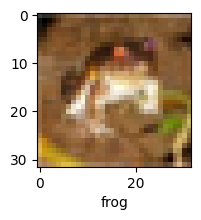

In [11]:
plot_sample(X_train, y_train, 0)

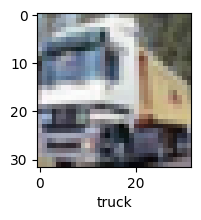

In [12]:
plot_sample(X_train, y_train, 1)

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 148s 94ms/step - loss: 1.8144 - accuracy: 0.3540
Epoch 2/5
1563/1563 [==============================] - 149s 95ms/step - loss: 1.6240 - accuracy: 0.4267
Epoch 3/5
1563/1563 [==============================] - 143s 91ms/step - loss: 1.5419 - accuracy: 0.4586
Epoch 4/5
1563/1563 [==============================] - 143s 91ms/step - loss: 1.4838 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.4342 - accuracy: 0.4953


In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 31ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.64      0.52      1000
           1       0.49      0.75      0.59      1000
           2       0.34      0.31      0.32      1000
           3       0.45      0.18      0.26      1000
           4       0.35      0.54      0.42      1000
           5       0.53      0.23      0.32      1000
           6       0.49      0.57      0.53      1000
           7       0.57      0.52      0.54      1000
           8       0.53      0.68      0.59      1000
           9       0.70      0.26      0.38      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.45     10000
weighted avg       0.49      0.47      0.45     10000



In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.4393 - accuracy: 0.4838
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1032 - accuracy: 0.6140
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9780 - accuracy: 0.6587
Epoch 4/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8963 - accuracy: 0.6878
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8307 - accuracy: 0.7115
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7787 - accuracy: 0.7298
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7317 - accuracy: 0.7432
Epoch 8/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.6902 - accuracy: 0.7579
Epoch 9/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.6536 - accuracy: 0.7735
Epoch 10/10
1563/1563 [==============================] - 71s 45m

In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.9412 - accuracy: 0.6965


[0.9412151575088501, 0.6965000033378601]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 14ms/step


array([[5.0342816e-04, 1.5585375e-03, 1.7247949e-03, 8.9448339e-01,
        4.5405752e-03, 8.8713869e-02, 2.7436616e-03, 3.4413571e-04,
        4.1316948e-03, 1.2560620e-03],
       [8.3635916e-04, 3.5572395e-02, 2.1495771e-06, 3.0346334e-07,
        1.1031937e-06, 2.9617123e-08, 9.1174797e-08, 4.6601900e-07,
        9.6196401e-01, 1.6231579e-03],
       [1.2365932e-01, 2.4010548e-01, 3.7855166e-04, 1.8223418e-03,
        1.7643576e-03, 3.8254063e-04, 1.0261085e-04, 2.9713402e-03,
        5.9476501e-01, 3.4048475e-02],
       [9.1501254e-01, 9.5358714e-03, 2.2370417e-02, 1.4467277e-03,
        3.0306607e-02, 4.2299882e-05, 1.0288409e-04, 6.6546796e-05,
        2.0791043e-02, 3.2500329e-04],
       [2.1148492e-07, 2.3496016e-06, 1.3535899e-03, 2.3393994e-02,
        2.5305566e-01, 3.2848914e-04, 7.2184962e-01, 2.2673639e-07,
        1.5824375e-05, 5.8113887e-08]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:8]

[3, 8, 8, 0, 6, 6, 1, 2]

In [22]:
y_test[:8]

array([3, 8, 8, 0, 6, 6, 1, 6], dtype=uint8)

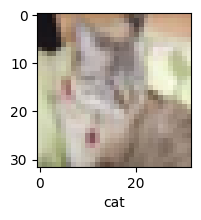

In [23]:
plot_sample(X_test, y_test,8)

In [24]:
classes[y_classes[5]]

'frog'

In [25]:
classes[y_classes[1]]

'ship'

In [26]:
classes[y_classes[7]]

'bird'